In [1]:
from glob import glob
import warnings
warnings.filterwarnings("ignore")

import altair as alt
from altair import datum
import joblib
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelBinarizer




In [2]:
alt.data_transformers.enable('json')
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [3]:
bank_train = pd.read_csv("../data/interim/bank_train.csv")
bank_test = pd.read_csv("../data/interim/bank_test.csv")

In [4]:
bank_X_tr = bank_train.drop("y", axis=1)
bank_y_tr_pp = LabelBinarizer().fit_transform(bank_train[["y"]]).ravel()

bank_X_tt = bank_test.drop("y", axis=1)
bank_y_tt_pp = LabelBinarizer().fit_transform(bank_test[["y"]]).ravel()

## Melhores modelos

In [5]:
models = []

for m in glob("../models/*.pkl"):
    model = joblib.load(m)
    print("Estimator: ", model.estimator.named_steps["clf"].__class__.__name__)
    print("AUC do Melhor Estimador: ", model.best_score_)
    models += [model]

Estimator:  RandomForestClassifier
AUC do Melhor Estimador:  0.8019645238469977
Estimator:  LinearSVC
AUC do Melhor Estimador:  0.7811653704475812
Estimator:  LogisticRegression
AUC do Melhor Estimador:  0.7822885384944351
Estimator:  DecisionTreeClassifier
AUC do Melhor Estimador:  0.7915722081721515


## Regressão Logística

In [6]:
lr_model = joblib.load("../models/lr.pkl")

In [7]:
lr_cv_df = pd.DataFrame(lr_model.cv_results_)

num_cols = ["param_clf__C", "param_clf__l1_ratio", "mean_test_score"]

lr_cv_df[num_cols] = lr_cv_df[num_cols].apply(pd.to_numeric)

In [8]:
lr_cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__l1_ratio,param_clf__penalty,param_transf_features__bin_campaign__encode,param_transf_features__bin_campaign__n_bins,param_transf_features__bin_campaign__strategy,...,param_transf_features__te_job__transformer,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.774577,0.257878,0.114256,0.044618,3.745401,0.950714,elasticnet,ordinal,3,uniform,...,target_encoder,"{'clf__C': 3.745401188473625, 'clf__l1_ratio':...",0.790416,0.767484,0.777452,0.784352,0.789390,0.781819,0.008511,21
1,2.600828,0.164934,0.068520,0.004531,6.011150,0.708073,l2,onehot,4,quantile,...,target_encoder,"{'clf__C': 6.011150117432088, 'clf__l1_ratio':...",0.790827,0.766588,0.776390,0.783970,0.787809,0.781117,0.008725,31
2,3.236352,0.206463,0.076115,0.019852,4.319450,0.291229,elasticnet,onehot,4,kmeans,...,target_encoder,"{'clf__C': 4.319450186421157, 'clf__l1_ratio':...",0.791452,0.767583,0.777040,0.785139,0.789140,0.782071,0.008748,14
3,2.850370,0.144162,0.061156,0.002871,0.464504,0.607545,l1,onehot,5,quantile,...,target_encoder,"{'clf__C': 0.46450412719997725, 'clf__l1_ratio...",0.790757,0.766723,0.776368,0.784150,0.788437,0.781287,0.008778,25
4,2.524021,0.173503,0.059591,0.002578,2.308938,0.241025,none,onehot,3,kmeans,...,leave_one_out,"{'clf__C': 2.3089382562214897, 'clf__l1_ratio'...",0.790928,0.767831,0.777474,0.785463,0.789382,0.782216,0.008570,5


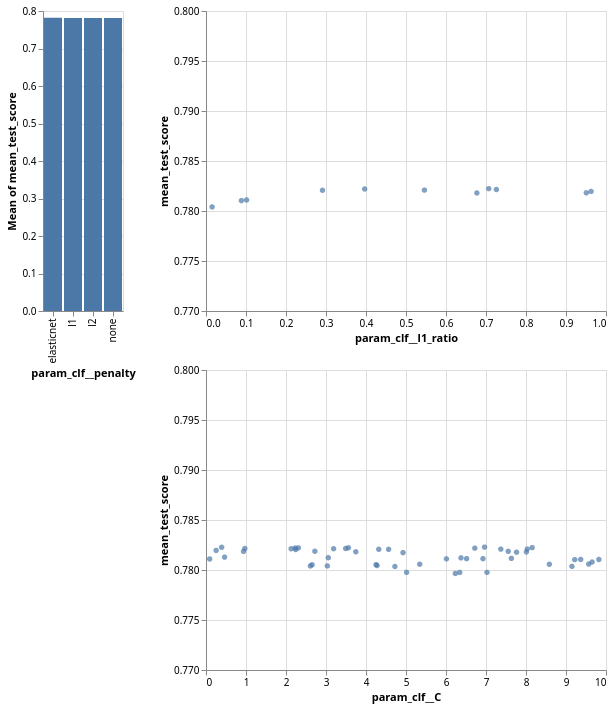

In [9]:
penalty = alt.Chart(lr_cv_df).mark_bar().encode(
    x="param_clf__penalty",
    y="mean(mean_test_score)"
)

l1_ratio = alt.Chart(lr_cv_df).mark_circle().encode(
    x="param_clf__l1_ratio",
    y=alt.Y("mean_test_score", scale=alt.Scale(domain=(0.77, 0.8)))
).transform_filter(
    (datum.param_clf__penalty == "elasticnet")
)

C = alt.Chart(lr_cv_df).mark_circle().encode(
    x="param_clf__C",
    y=alt.Y("mean_test_score", scale=alt.Scale(domain=(0.77, 0.8)))
)

penalty | l1_ratio & C

## Linear SCV

In [10]:
svc_model = joblib.load("../models/svc.pkl")

In [11]:
svc_cv_df = pd.DataFrame(svc_model.cv_results_)

#cols = ["param_clf__C", "param_clf__l1_ratio", "param_clf__penalty", "mean_test_score"]
num_cols = ["param_clf__C", "mean_test_score"]

svc_cv_df[num_cols] = svc_cv_df[num_cols].apply(pd.to_numeric)

In [12]:
svc_cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__loss,param_transf_features__bin_campaign__encode,param_transf_features__bin_campaign__n_bins,param_transf_features__bin_campaign__strategy,param_transf_features__bin_previous__encode,...,param_transf_features__te_job__transformer,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.636662,0.343578,0.081884,0.007987,0.374540,hinge,onehot,5,uniform,onehot,...,target_encoder,"{'clf__C': 0.3745401188473625, 'clf__loss': 'h...",0.780829,0.761930,0.762514,0.767481,0.776584,0.769867,0.007590,30
1,13.430878,1.071256,0.131904,0.051650,0.601115,squared_hinge,onehot,4,uniform,ordinal,...,target_encoder,"{'clf__C': 0.6011150117432088, 'clf__loss': 's...",0.791212,0.765020,0.774579,0.780555,0.788096,0.779893,0.009437,5
2,13.996355,0.937527,0.127687,0.032213,0.304242,squared_hinge,onehot,3,uniform,onehot,...,one_hot_encoder,"{'clf__C': 0.3042422429595377, 'clf__loss': 's...",0.788720,0.765787,0.774059,0.781428,0.787120,0.779423,0.008537,11
3,8.134921,0.748770,0.105090,0.022603,0.456070,hinge,ordinal,5,kmeans,ordinal,...,target_encoder,"{'clf__C': 0.45606998421703593, 'clf__loss': '...",0.776399,0.761141,0.764126,0.763930,0.766935,0.766506,0.005275,45
4,13.482780,0.865334,0.095291,0.009859,0.065052,squared_hinge,onehot,4,quantile,ordinal,...,one_hot_encoder,"{'clf__C': 0.06505159298527952, 'clf__loss': '...",0.788969,0.765275,0.773402,0.781354,0.786143,0.779028,0.008668,13


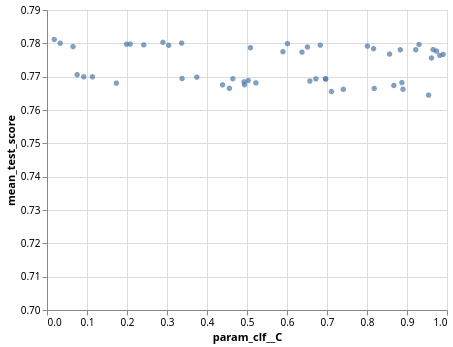

In [13]:
C = alt.Chart(svc_cv_df).mark_circle().encode(
    x="param_clf__C",
    y=alt.Y("mean_test_score", scale=alt.Scale(domain=(0.7, 0.79)))
)

C

## Árvores de Decisão

In [14]:
dt_model = joblib.load("../models/dt.pkl")

In [15]:
dt_cv_df = pd.DataFrame(dt_model.cv_results_)

num_cols = ["param_clf__min_samples_leaf", "param_clf__min_samples_split", "mean_test_score"]

dt_cv_df[num_cols] = dt_cv_df[num_cols].apply(pd.to_numeric)

In [16]:
dt_cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__min_samples_leaf,param_clf__min_samples_split,param_transf_features__bin_campaign__encode,param_transf_features__bin_campaign__n_bins,param_transf_features__bin_campaign__strategy,param_transf_features__bin_previous__encode,...,param_transf_features__te_job__transformer,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.814520,0.133731,0.112454,0.008308,0.007491,0.095071,onehot,3,uniform,onehot,...,target_encoder,"{'clf__min_samples_leaf': 0.00749080237694725,...",0.788268,0.780545,0.779884,0.797166,0.782108,0.785594,0.006501,44
1,0.613855,0.052512,0.108104,0.027023,0.012022,0.070807,ordinal,3,quantile,ordinal,...,target_encoder,{'clf__min_samples_leaf': 0.012022300234864176...,0.787879,0.779771,0.785718,0.798155,0.789247,0.788154,0.005958,22
2,0.791610,0.125305,0.133242,0.035739,0.006085,0.052476,ordinal,3,uniform,onehot,...,one_hot_encoder,{'clf__min_samples_leaf': 0.006084844859190755...,0.791311,0.783345,0.787245,0.800388,0.785245,0.789507,0.006048,8
3,0.737098,0.093224,0.119265,0.042755,0.009121,0.078518,onehot,5,uniform,onehot,...,leave_one_out,{'clf__min_samples_leaf': 0.009121399684340718...,0.790402,0.783409,0.781614,0.798776,0.790090,0.788858,0.006074,12
4,0.868598,0.233552,0.140970,0.046214,0.018978,0.096563,ordinal,4,uniform,ordinal,...,one_hot_encoder,{'clf__min_samples_leaf': 0.018977710745066666...,0.783346,0.780176,0.783060,0.798081,0.782956,0.785524,0.006382,45


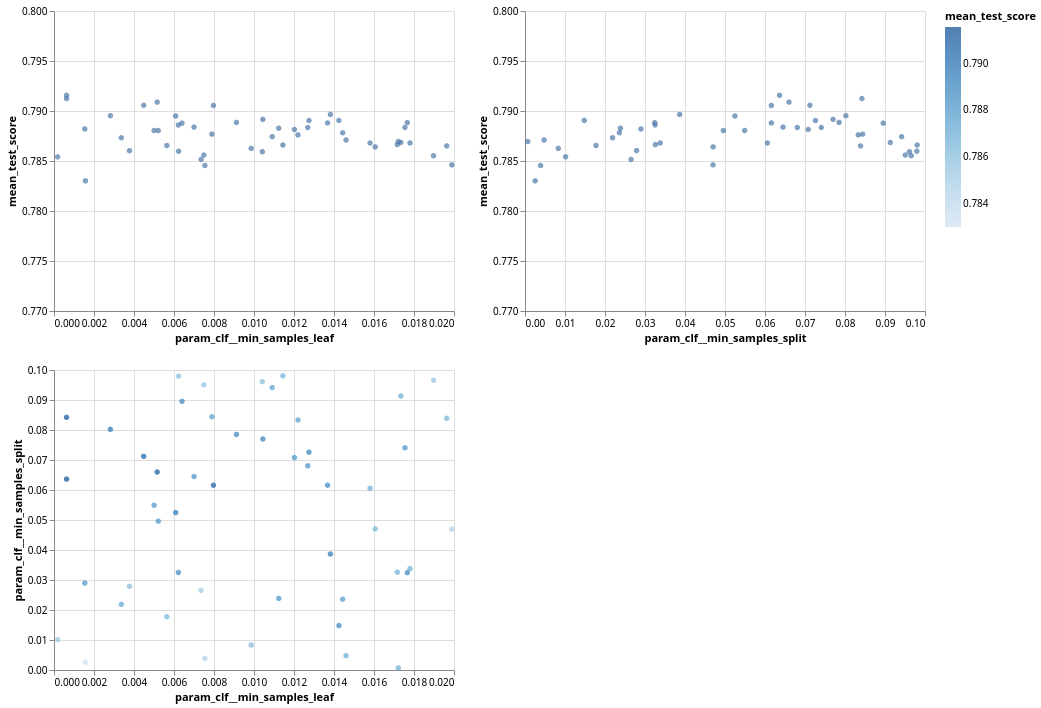

In [17]:
min_leafs = alt.Chart(dt_cv_df).mark_circle().encode(
    x="param_clf__min_samples_leaf",
    y=alt.Y("mean_test_score", scale=alt.Scale(domain=(0.77, 0.8)))
)

min_split = alt.Chart(dt_cv_df).mark_circle().encode(
    x="param_clf__min_samples_split",
    y=alt.Y("mean_test_score", scale=alt.Scale(domain=(0.77, 0.8)))
)

leafs_x_split = alt.Chart(dt_cv_df).mark_circle().encode(
    x="param_clf__min_samples_leaf",
    y="param_clf__min_samples_split",
    color="mean_test_score"
)

(min_leafs | min_split) & (leafs_x_split)

## Random Forest

In [18]:
rf_model = joblib.load("../models/rf.pkl")

In [19]:
rf_cv_df = pd.DataFrame(rf_model.cv_results_)

num_cols = ["param_clf__max_depth", "param_clf__max_features", "param_clf__min_samples_leaf", "param_clf__min_samples_split", "mean_test_score"]

rf_cv_df = rf_cv_df[num_cols].apply(pd.to_numeric)

In [20]:
rf_cv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   param_clf__max_depth          50 non-null     int64  
 1   param_clf__max_features       50 non-null     float64
 2   param_clf__min_samples_leaf   50 non-null     float64
 3   param_clf__min_samples_split  50 non-null     float64
 4   mean_test_score               26 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


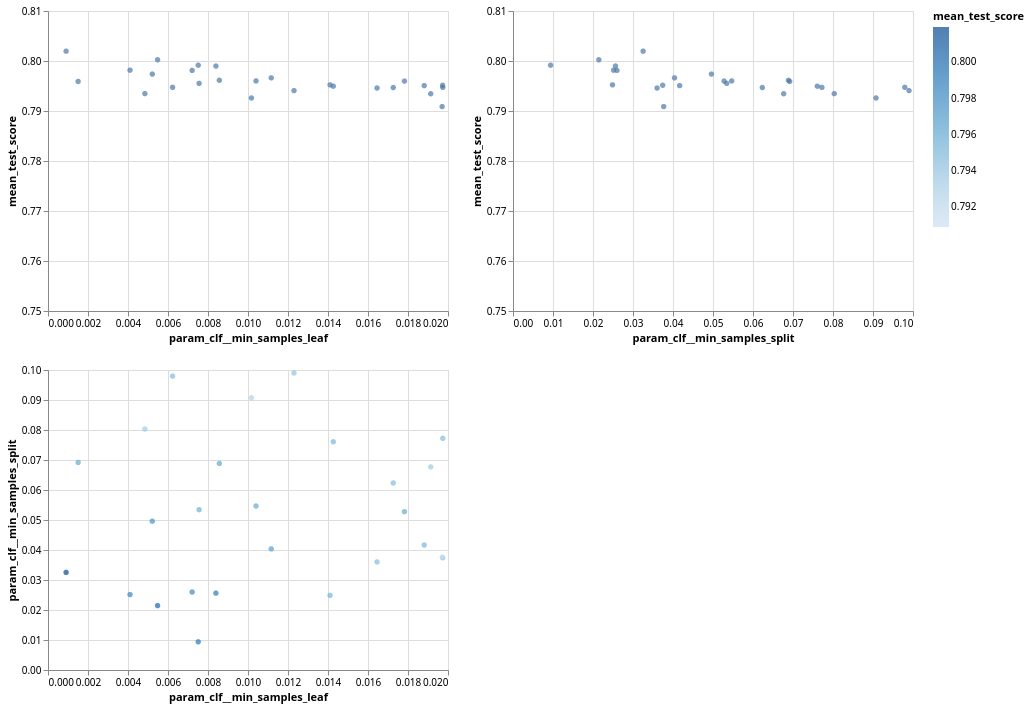

In [21]:
min_leafs = alt.Chart(rf_cv_df).mark_circle().encode(
    x="param_clf__min_samples_leaf",
    y=alt.Y("mean_test_score", scale=alt.Scale(domain=(0.75, 0.81)))
)

min_split = alt.Chart(rf_cv_df).mark_circle().encode(
    x="param_clf__min_samples_split",
    y=alt.Y("mean_test_score", scale=alt.Scale(domain=(0.75, 0.81)))
)

leafs_x_split = alt.Chart(rf_cv_df).mark_circle().encode(
    x="param_clf__min_samples_leaf",
    y="param_clf__min_samples_split",
    color="mean_test_score"
)

(min_leafs | min_split) & (leafs_x_split)

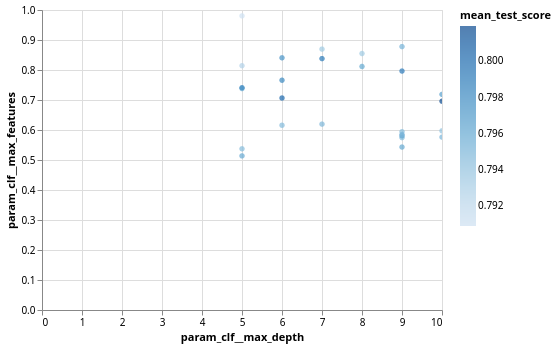

In [22]:
max_depth = alt.Chart(rf_cv_df).mark_circle().encode(
    x="param_clf__max_depth",
    y="param_clf__max_features",
    color="mean_test_score",
    tooltip="mean_test_score"
).interactive()

max_depth

## Roc Curve

In [23]:
roc_dfs = []

for m in glob("../models/*.pkl"):
    model = joblib.load(m)
    model_name = model.estimator.named_steps["clf"].__class__.__name__
    y_preds = cross_val_predict(model.best_estimator_, bank_X_tr, bank_y_tr_pp, cv = 5, method = "predict_proba" if model_name != "LinearSVC" else "decision_function")
    fpr, tpr, thresholds = roc_curve(y_true=bank_y_tr_pp, y_score=y_preds[:, 1] if model_name != "LinearSVC" else y_preds)
    auc_ = model.best_score_
    data_ = pd.DataFrame({"model": [model_name]*len(fpr), "fpr": fpr, "tpr": tpr, "thresholds": thresholds, "auc": [auc_]*len(fpr)})
    roc_dfs.append(data_)
    print(model_name)
    
roc_curves_df = pd.concat(roc_dfs)

RandomForestClassifier
LinearSVC
LogisticRegression
DecisionTreeClassifier


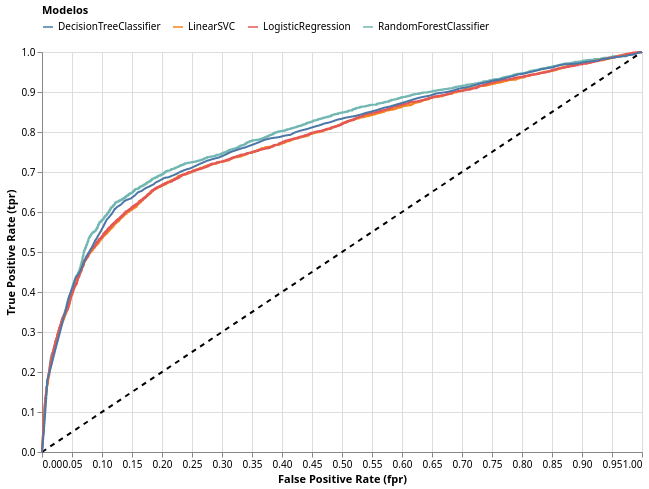

In [24]:
line = pd.DataFrame({"fpr": [0, 1], "tpr": [0, 1]})

base_plot = alt.Chart(line).mark_line(color="black", strokeDash=[5, 5]).encode(
    x=alt.X("fpr", title="False Positive Rate (fpr)"),
    y=alt.Y("tpr", title="True Positive Rate (tpr)")
)

roc_plot = alt.Chart(roc_curves_df).mark_line().encode(
    x="fpr:Q",
    y="tpr:Q",
    color=alt.Color("model:N", legend=alt.Legend(orient="top", title="Modelos")),
    tooltip=["model:N", "fpr:Q", "tpr:Q", "thresholds:Q", "auc:Q"]
)

(base_plot + roc_plot).properties(height=400, width=600)

## Precision Recall Curve

In [25]:
pr_rec_dfs = []

for m in glob("../models/*.pkl"):
    model = joblib.load(m)
    model_name = model.estimator.named_steps["clf"].__class__.__name__
    y_preds = cross_val_predict(model.best_estimator_, bank_X_tr, bank_y_tr_pp, cv = 5, method = "predict_proba" if model_name != "LinearSVC" else "decision_function")
    precision, recall, thresholds = precision_recall_curve(y_true=bank_y_tr_pp, probas_pred=y_preds[:, 1] if model_name != "LinearSVC" else y_preds)        
    data_ = pd.DataFrame({"model": [model_name]*len(thresholds), "recall": recall[:-1], "precision": precision[:-1], "thresholds": thresholds})
    pr_rec_dfs.append(data_)
    print(model_name)
    
pr_rec_df = pd.concat(pr_rec_dfs)

RandomForestClassifier
LinearSVC
LogisticRegression
DecisionTreeClassifier


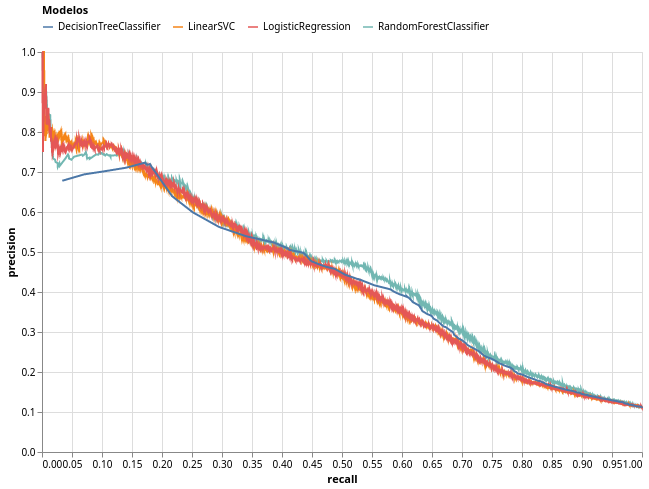

In [26]:
pr_rec_plot = alt.Chart(pr_rec_df).mark_line().encode(
    x="recall:Q",
    y="precision:Q",
    color=alt.Color("model:N", legend=alt.Legend(orient="top", title="Modelos")),
    tooltip=["model:N", "recall:Q", "precision:Q", "thresholds:Q"]
).properties(height=400, width=600)

pr_rec_plot

In [27]:
rf_model.best_estimator_.named_steps["transf_features"].named_transformers_["pca_econ_vars"].named_steps["pca"]

PCA(n_components=1)

In [28]:
col_names = [
    "age",
    "job",
    *rf_model.best_estimator_.named_steps["transf_features"].named_transformers_["oh_marital"].get_feature_names_out().tolist(),
    "education",
    "month",
    "day_of_week",
    *rf_model.best_estimator_.named_steps["transf_features"].named_transformers_["oh_default"].get_feature_names_out().tolist(),
    *rf_model.best_estimator_.named_steps["transf_features"].named_transformers_["oh_housing_loan_contact"].get_feature_names_out().tolist(),
    *rf_model.best_estimator_.named_steps["transf_features"].named_transformers_["bin_campaign"].get_feature_names_out().tolist(),
    *rf_model.best_estimator_.named_steps["transf_features"].named_transformers_["bin_previous"].get_feature_names_out().tolist(),
    "pca_econ_vars",
    *["cons.price.idx", "cons.conf.idx"]
]


In [29]:
feature_importances = pd.DataFrame({
    "feature": col_names,
    "importance": rf_model.best_estimator_.named_steps["clf"].feature_importances_
})

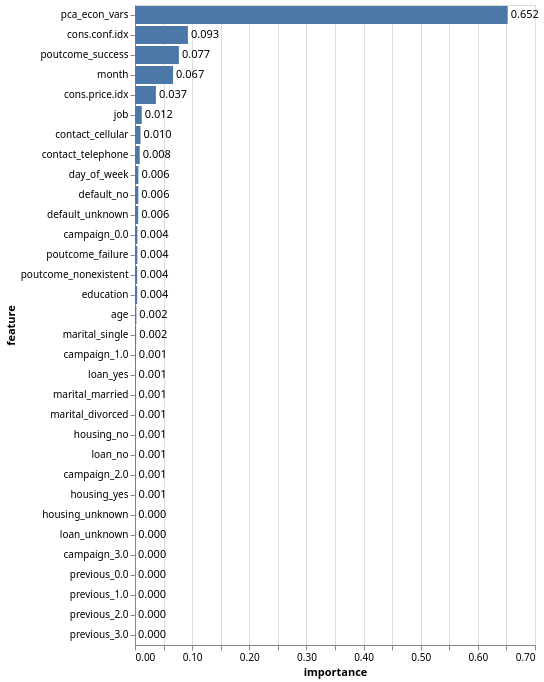

In [30]:
bars = alt.Chart(feature_importances).mark_bar().encode(
    x="importance:Q",
    y=alt.Y("feature", sort=alt.EncodingSortField("importance", op='min', order='descending'))
)

text = bars.mark_text(
    align="left",
    baseline="middle",
    dx=3,
).encode(
    text=alt.Text("importance:Q", format=".3f")
)

bars + text